In [1]:
from time import time
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer , scale
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
pisos = pd.read_csv('houses_Madrid.csv')

# DATASET

***El dataset contiene información sobre los precios de vivienda en Madrid, y la mayoría de las propiedades registradas son de tipo "pisos". Esto indica que la mayoría de las unidades de vivienda en el conjunto de datos son apartamentos ubicados en edificios de varios pisos. Estos pisos pueden variar en tamaño, ubicación, número de habitaciones y otras características que influyen en sus precios.***

***El hecho de que la mayoría de las propiedades sean pisos puede deberse a diversas razones, como la alta densidad de población en las áreas urbanas, la preferencia de los residentes por vivir en apartamentos más compactos y cercanos a servicios y comodidades, y la disponibilidad de suelo limitada para nuevas construcciones en el centro de la ciudad.***

In [3]:
print('Contenido y Forma de los datos')
print('filas y columnas: {}'.format(pisos.shape))

Contenido y Forma de los datos
filas y columnas: (21742, 58)


# En este proyecto voy a construir un modelo sobre el  precio de la vivienda en Madrid.


***Partimos de un conjunto de datos que consta de 21742 filas y 58 columnas con diferentes
métricas como precio de vivienda, numero de habitaciones, numero de baños, metros cuadrados...***

In [4]:
pisos.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


# Primero vamos a eliminar la columna "Unnamed:0" y  vamos a tomar de index la columna "id".

In [5]:
pisos.drop(columns=['Unnamed: 0'], inplace=True)
pisos.set_index('id', inplace=True)
pisos.head()

,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,
21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [6]:
print('filas y columnas: {}'.format(pisos.shape))
print('Total Entradas: {}'.format(pisos.size))

filas y columnas: (21742, 56)
Total Entradas: 1217552


***El dataset que tienes contiene una serie de características (features) que describen diferentes aspectos de propiedades inmobiliarias. A continuación, te explicaré cada una de las características:***

1. 'título': El título del anuncio o publicación de la propiedad.

2. 'subtítulo': Un subtítulo adicional que complementa la descripción de la propiedad.

3. 'm2_construidos': La cantidad de metros cuadrados construidos de la propiedad.

4. 'm2_útiles': La cantidad de metros cuadrados útiles de la propiedad (área habitable).

5. 'n_habitaciones': El número de habitaciones (dormitorios) que tiene la propiedad.

6. 'n_baños': El número de baños que tiene la propiedad.

7. 'n_pisos': El número de pisos (plantas) que tiene la propiedad.

8. 'm2_asignación': La cantidad de metros cuadrados asignados a la propiedad, que podría referirse a áreas comunes en un edificio.

9. 'latitud': La coordenada de latitud geográfica de la ubicación de la propiedad.

10. 'longitud': La coordenada de longitud geográfica de la ubicación de la propiedad.

11. 'raw_address': La dirección sin procesar de la propiedad.

12. 'is_exact_address_hidden': Un valor booleano que indica si la dirección exacta de la propiedad está oculta o no.

13. 'street_name': El nombre de la calle en la que se encuentra la propiedad.

14. 'calle_número': El número de la calle donde se encuentra la propiedad.

15. 'portal': Número de portal o entrada a la propiedad (en edificios).

16. 'piso': El número de piso en el que se encuentra la propiedad.

17. 'es_piso_debajo': Un valor booleano que indica si la propiedad está en un piso debajo del nivel de la calle.

18. 'puerta': El número de puerta o apartamento en el que se encuentra la propiedad.

19. 'neighborhood_id': Identificador único del barrio o vecindario en el que se encuentra la propiedad.

20. 'operación': El tipo de operación, que podría ser "venta" o "alquiler".

21. 'rent_price': El precio de alquiler de la propiedad.

22. 'rent_price_by_area': El precio de alquiler dividido por el área útil de la propiedad.

23. 'is_rent_price_known': Un valor booleano que indica si el precio de alquiler es conocido o no.

24. 'buy_price': El precio de venta de la propiedad.

25. 'buy_price_by_area': El precio de venta dividido por el área útil de la propiedad.

26. 'is_buy_price_known': Un valor booleano que indica si el precio de venta es conocido o no.

27. 'house_type_id': Identificador único del tipo de propiedad (casa, piso, chalet, etc.).

28. 'is_renewal_needed': Un valor booleano que indica si la propiedad necesita renovación o no.

29. 'es_nuevo_desarrollo': Un valor booleano que indica si la propiedad es de nuevo desarrollo o no.

30. 'año_construido': El año de construcción de la propiedad.

31. 'tiene_calefacción_central': Un valor booleano que indica si la propiedad tiene calefacción central.

32. 'tiene_calefacción_individual': Un valor booleano que indica si la propiedad tiene calefacción individual.

33. 'se_admiten_mascotas': Un valor booleano que indica si se admiten mascotas en la propiedad.

34. 'tiene_ac': Un valor booleano que indica si la propiedad tiene aire acondicionado.

35. 'tiene_armarios_equipados': Un valor booleano que indica si la propiedad tiene armarios equipados.

36. 'tiene_ascensor': Un valor booleano que indica si la propiedad tiene ascensor.

37. 'es_exterior': Un valor booleano que indica si la propiedad es exterior.

38. 'tiene_jardín': Un valor booleano que indica si la propiedad tiene jardín.

39. 'tiene_piscina': Un valor booleano que indica si la propiedad tiene piscina.

40. 'tiene_terraza': Un valor booleano que indica si la propiedad tiene terraza.

41. 'tiene_balcón': Un valor booleano que indica si la propiedad tiene balcón.

42. 'tiene_trastero': Un valor booleano que indica si la propiedad tiene trastero.

43. 'está_amueblado': Un valor booleano que indica si la propiedad está amueblada.

44. 'está_cocina_equipada': Un valor booleano que indica si la propiedad tiene la cocina equipada.

45. 'es_accesible': Un valor booleano que indica si la propiedad es accesible para personas con discapacidad.

46. 'has_green_zones': Un valor booleano que indica si la propiedad cuenta con zonas verdes cercanas.

47. 'energy_certificate': Información sobre el certificado energético de la propiedad.

48. 'has_parking': Un valor booleano que indica si la propiedad tiene aparcamiento.

49. 'tiene_estacionamiento_privado': Un valor booleano que indica si la propiedad tiene estacionamiento privado.

50. 'tiene_estacionamiento_publico': Un valor booleano que indica si la propiedad tiene estacionamiento público cercano.

51. 'is_parking_included_in_price': Un valor booleano que indica si el aparcamiento está incluido en el precio de la propiedad.

52. 'parking_price': El precio del aparcamiento si no está incluido en el precio de la propiedad.

53. 'is_orientation_north': Un valor booleano que indica si la propiedad tiene orientación al norte.

54. 'es_orientación_oeste': Un valor booleano que indica si la propiedad tiene orientación al oeste.

55. 'es_orientación_sur': Un valor booleano que indica si la propiedad tiene orientación al sur.

56. 'es_orientación_este': Un valor booleano que indica si la propiedad tiene orientación al este.

***Cada una de estas características puede ser relevante para el análisis y predicción de precios o características de las propiedades inmobiliarias. Dependiendo de tus objetivos, deberás seleccionar las características más importantes y realizar el preprocesamiento adecuado para utilizarlas en tus modelos de machine learning.***

In [7]:
pisos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21742 entries, 21742 to 1
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         21742 non-null  object 
 1   subtitle                      21742 non-null  object 
 2   sq_mt_built                   21616 non-null  float64
 3   sq_mt_useful                  8228 non-null   float64
 4   n_rooms                       21742 non-null  int64  
 5   n_bathrooms                   21726 non-null  float64
 6   n_floors                      1437 non-null   float64
 7   sq_mt_allotment               1432 non-null   float64
 8   latitude                      0 non-null      float64
 9   longitude                     0 non-null      float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

<AxesSubplot:xlabel='buy_price', ylabel='Density'>

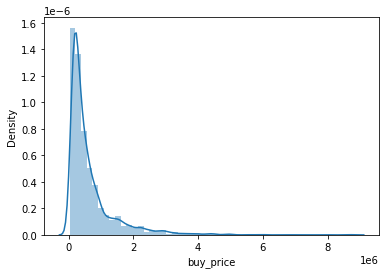

In [8]:
sns.distplot(pisos['buy_price'])

In [9]:
#Valores de simetría y curtosis antes de tratar
print("Skewness: %f" % pisos['buy_price'].skew())
print("Kurtosis: %f" % pisos['buy_price'].kurt())

Skewness: 3.323645
Kurtosis: 16.912254


***Podemos ver que la distribucion tiene un sesgo positivo***

In [10]:
Venta=pisos[pisos['is_buy_price_known']==True]
Venta=Venta['buy_price']
Venta.describe()

count    2.174200e+04
mean     6.537356e+05
std      7.820821e+05
min      3.600000e+04
25%      1.980000e+05
50%      3.750000e+05
75%      7.636000e+05
max      8.800000e+06
Name: buy_price, dtype: float64

***Podemos observar una serie de detalles sobre los precios,el más económico 
esta en 360000 euros mientras que el más caro en 8800000 euros, una ganga...***

In [11]:
pisos.isnull().sum()

title                               0
subtitle                            0
sq_mt_built                       126
sq_mt_useful                    13514
n_rooms                             0
n_bathrooms                        16
n_floors                        20305
sq_mt_allotment                 20310
latitude                        21742
longitude                       21742
raw_address                      5465
is_exact_address_hidden             0
street_name                      5905
street_number                   15442
portal                          21742
floor                            2607
is_floor_under                   1170
door                            21742
neighborhood_id                     0
operation                           0
rent_price                          0
rent_price_by_area              21742
is_rent_price_known                 0
buy_price                           0
buy_price_by_area                   0
is_buy_price_known                  0
house_type_i

***Tenemos 179 datos duplicados y una serie de columnas sin datos que hay que eliminar, 
son todas las que tienen 21742 datos nulos es decir, las ultimas 10 columnas, a la hora de eliminar
voy a eliminar también las columnas 'n_floors' y 'sq_mt_allotment', ya que tienen 20300 datos nulos cada una. 
Después trataremos el resto de columnas ya que hay muchas en las que hay datos nulos y por lo tanto no son 
uniformes y nos daran resultados sesgados*** 

In [12]:
print(pisos.duplicated)

<bound method DataFrame.duplicated of                                                    title  \
id                                                         
21742              Piso en venta en calle de Godella, 64   
21741   Piso en venta en calle de la del Manojo de Rosas   
21740               Piso en venta en calle del Talco, 68   
21739               Piso en venta en calle Pedro Jiménez   
21738  Piso en venta en carretera de Villaverde a Val...   
...                                                  ...   
5           Ático en venta en Casco Histórico de Barajas   
4      Piso en venta en Urb. Campo de las Naciones - ...   
3      Piso en venta en Campo de las Naciones-Corralejos   
2          Chalet adosado en venta en calle Burriana, 12   
1                 Piso en venta en calle San Epifanio, 9   

                                       subtitle  sq_mt_built  sq_mt_useful  \
id                                                                           
21742                    

***Observo que con los datos duplicados no hay problema, sin embargo hay muchos valores nulos***

In [13]:
pisos.columns

Index(['title', 'subtitle', 'sq_mt_built', 'sq_mt_useful', 'n_rooms',
       'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orien

In [14]:
print(pisos.shape)
pisos.head()

(21742, 56)


,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
id,,,,,,,,,,,,,,,,,,,,,
21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


***Comienzo eliminando las columnas sin datos y las que entiendo que no voy a necesitar para la predicción,  entre ellas 'title', 'subtitle', 'operation' y 'rent_price', ya que me voy a centrar en el precio de venta de los pisos***

In [15]:
pisos.drop(columns=['title', 'subtitle', 'sq_mt_useful','n_floors', 
       'sq_mt_allotment', 'latitude', 'longitude',
       'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'door',
       'rent_price_by_area', 'built_year',
       'is_rent_price_known', 'buy_price_by_area',
       'is_buy_price_known', 'is_furnished',
       'has_central_heating', 'rent_price',
       'are_pets_allowed',
       'is_kitchen_equipped',
       'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
       'is_parking_included_in_price', 'parking_price', 'is_orientation_north',
       'is_orientation_west', 'is_orientation_south', 'is_orientation_east'], inplace=True)

In [16]:
pisos.shape

(21742, 23)

In [17]:
pisos.describe().T

,count,mean,std,min,25%,50%,75%,max
sq_mt_built,21616.0,146.920892,134.181865,13.0,70.0,100.0,162.0,999.0
n_rooms,21742.0,3.005749,1.510497,0.0,2.0,3.0,4.0,24.0
n_bathrooms,21726.0,2.091687,1.406992,1.0,1.0,2.0,2.0,16.0
buy_price,21742.0,653735.647503,782082.069836,36000.0,198000.0,375000.0,763600.0,8800000.0


In [18]:
pisos.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,operation,buy_price,house_type_id,is_renewal_needed,...,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,85000,HouseType 1: Pisos,False,...,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21741,70.0,3,1.0,4,False,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,129900,HouseType 1: Pisos,True,...,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN
21740,94.0,2,2.0,1,False,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,144247,HouseType 1: Pisos,False,...,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN
21739,64.0,2,1.0,Bajo,True,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,109900,HouseType 1: Pisos,False,...,NaN,True,True,NaN,NaN,NaN,NaN,True,True,NaN
21738,108.0,2,2.0,4,False,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,260000,HouseType 1: Pisos,False,...,True,True,True,NaN,True,NaN,NaN,True,NaN,True


***Vamos a obsevar la correlacion de los datos restantes respecto al precio de los pisos, veamos, ya 
que si la correlacion es muy baja los datos no nos van a ayudar mucho, todo lo contrario*** 

In [19]:
corr = pisos.corr()
corr

,sq_mt_built,n_rooms,n_bathrooms,buy_price,is_renewal_needed
sq_mt_built,1.000000,0.715981,0.852856,0.832039,0.061207
n_rooms,0.715981,1.000000,0.729152,0.608893,0.171408
n_bathrooms,0.852856,0.729152,1.000000,0.772218,0.000692
buy_price,0.832039,0.608893,0.772218,1.000000,0.044302
is_renewal_needed,0.061207,0.171408,0.000692,0.044302,1.000000


***Hay tres datos que estan my correlacionados con el precio del piso, los metros, el numero de habitaciones y el numero de baños, evidentemente cuantos más metros, habitaciones o baños tenga una casa más cara será, ya que será de mayor tamaño, luego veremos como cuanto mayor sea la planta en caso de ser piso, tambien influye y por supuesto el distrito donde se vive, con las mismas caracteristicas es más caro un piso en el Barrio de Salamanca que otro que este en Vallecas.***

In [20]:
pisos.corr()['buy_price'].sort_values(ascending=False)

buy_price            1.000000
sq_mt_built          0.832039
n_bathrooms          0.772218
n_rooms              0.608893
is_renewal_needed    0.044302
Name: buy_price, dtype: float64

***Hay varias columnas que no tienen ninguna correlación con el precio por lo que hay que eliminarlas tambien***

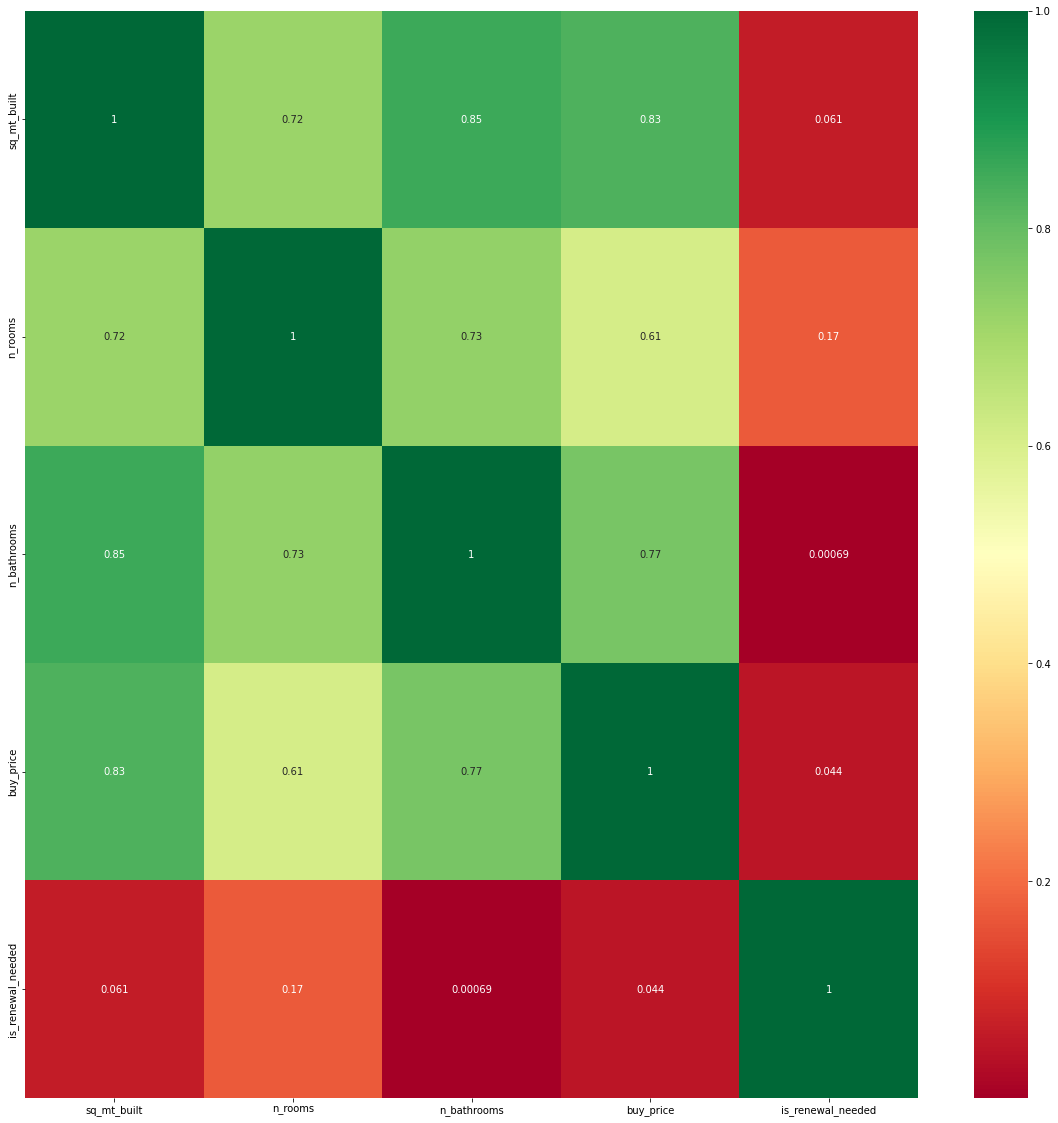

In [21]:
#Matriz de correlaciones
corrmat = pisos.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(pisos[top_corr_features].corr(),annot=True,cmap="RdYlGn")

***Visualización de la tendencia entre precios de compra y metros cuadrados***

<AxesSubplot:xlabel='sq_mt_built', ylabel='buy_price'>

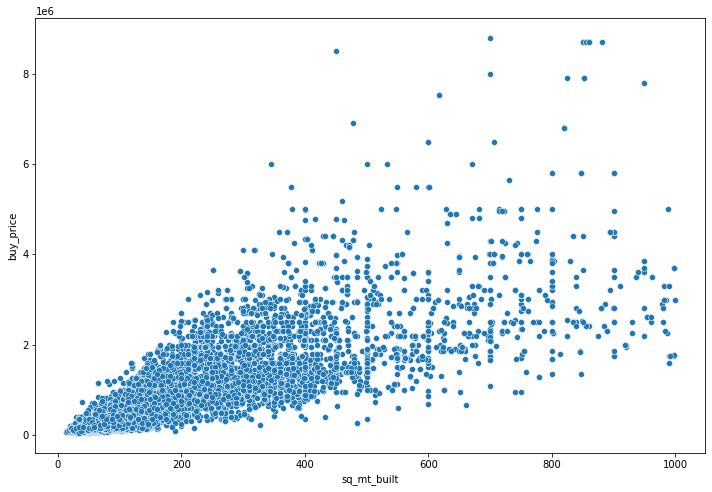

In [22]:
# Visualización de la tendencia entre precios de compra y metros cuadrados
plt.figure(figsize=(12,8))
sns.scatterplot(x='sq_mt_built', y='buy_price', data=pisos)

***Visualización de la tendencia entre precios de compra y numero de habitaciones***

<AxesSubplot:xlabel='n_rooms', ylabel='count'>

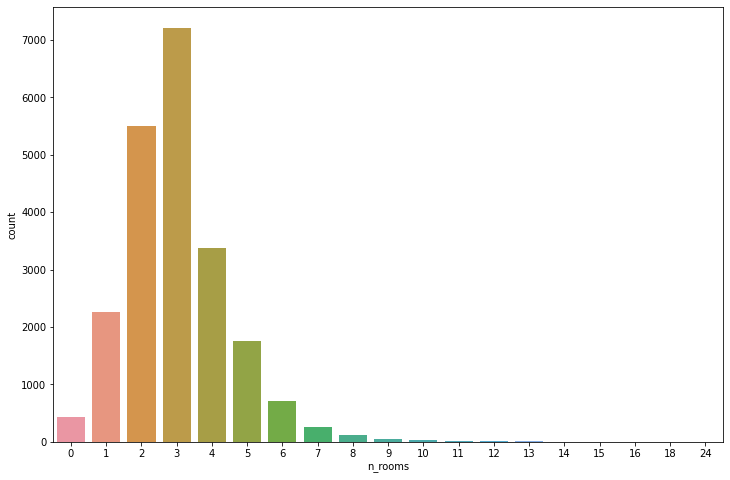

In [23]:
# Frecuencia por numero de habitaciones
plt.figure(figsize=(12,8))
sns.countplot(x='n_rooms', data=pisos)

In [24]:
pisos.sort_values('n_rooms', ascending=False).head(5)

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,operation,buy_price,house_type_id,is_renewal_needed,...,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones
id,,,,,,,,,,,,,,,,,,,,,
7169,750.0,24,4.0,NaN,False,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,sale,5000000,HouseType 2: Casa o chalet,True,...,True,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN
7452,682.0,24,4.0,NaN,False,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,sale,4800000,HouseType 2: Casa o chalet,True,...,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN
7518,682.0,24,4.0,NaN,False,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,sale,4800000,HouseType 2: Casa o chalet,False,...,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN
6484,750.0,18,7.0,NaN,NaN,Neighborhood 28: El Viso (6255.45 €/m2) - Dist...,sale,5000000,HouseType 2: Casa o chalet,False,...,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN
14905,NaN,16,10.0,NaN,False,Neighborhood 72: Aravaca (3600.4 €/m2) - Distr...,sale,2800000,HouseType 2: Casa o chalet,False,...,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN


***Visualización de la tendencia entre precios de compra y numero de baños***

<AxesSubplot:xlabel='n_bathrooms', ylabel='count'>

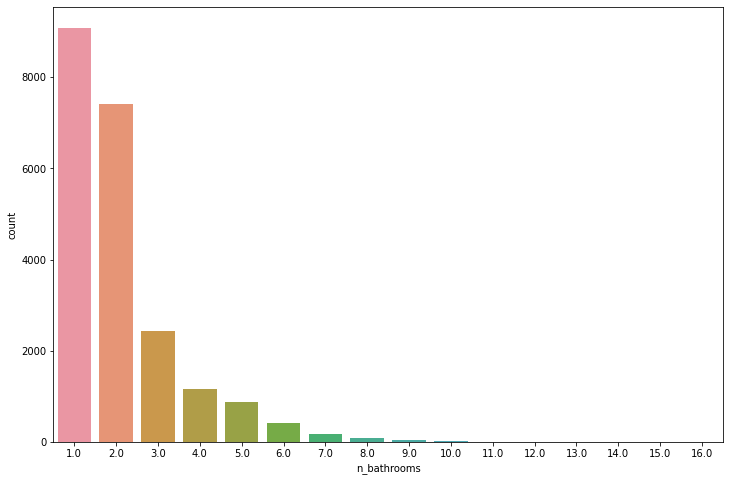

In [25]:
# Frecuencia por numero de baños
plt.figure(figsize=(12,8))
sns.countplot(x='n_bathrooms', data=pisos)

In [26]:
pisos.sort_values('n_bathrooms', ascending=False).head(5)

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,operation,buy_price,house_type_id,is_renewal_needed,...,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones
id,,,,,,,,,,,,,,,,,,,,,
13757,NaN,10,16.0,NaN,False,Neighborhood 76: El Plantío (2569.96 €/m2) - D...,sale,3000000,HouseType 2: Casa o chalet,False,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN
14598,NaN,10,15.0,NaN,NaN,Neighborhood 76: El Plantío (2569.96 €/m2) - D...,sale,3000000,HouseType 2: Casa o chalet,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
13675,NaN,8,14.0,NaN,NaN,Neighborhood 76: El Plantío (2569.96 €/m2) - D...,sale,3000000,HouseType 2: Casa o chalet,False,...,True,NaN,NaN,True,True,True,NaN,True,NaN,NaN
14582,NaN,11,14.0,NaN,False,Neighborhood 76: El Plantío (2569.96 €/m2) - D...,sale,3000000,HouseType 2: Casa o chalet,False,...,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN
17177,620.0,7,14.0,1,False,Neighborhood 95: Pacífico (4105.12 €/m2) - Dis...,sale,1300000,HouseType 1: Pisos,True,...,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***También esta correlacionado si la vivienda necesita restauración, si la necesita es más económico.***

<AxesSubplot:xlabel='is_renewal_needed', ylabel='count'>

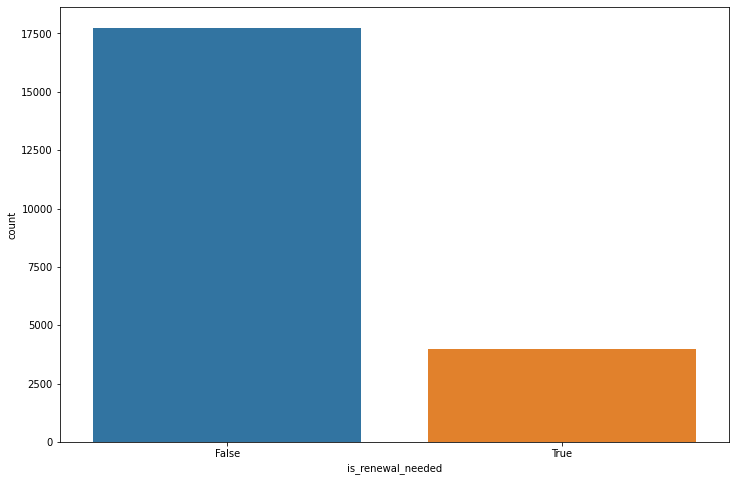

In [27]:
# Frecuencia si necesita ser rehabilitada la vivienda.
plt.figure(figsize=(12,8))
sns.countplot(x='is_renewal_needed', data=pisos)

Precio más alto de piso en el Dataset

Precio más alto de piso en el Dataset:  8800000


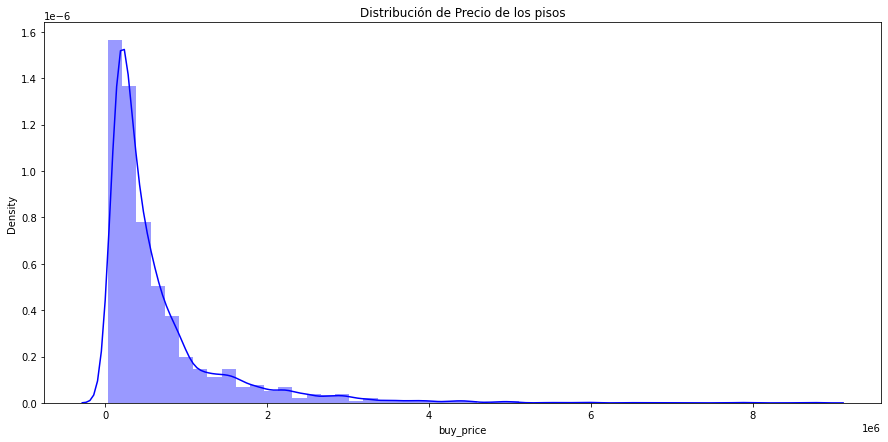

In [28]:
plt.figure(figsize=(15, 7))
sns.distplot(pisos["buy_price"], color="blue")
plt.xlabel("buy_price")
plt.title("Distribución de Precio de los pisos")
print("Precio más alto de piso en el Dataset: ", pisos["buy_price"].max())
plt.show()

Precio más bajo de piso en el Dataset

Precio más bajo de piso en el Dataset:  36000


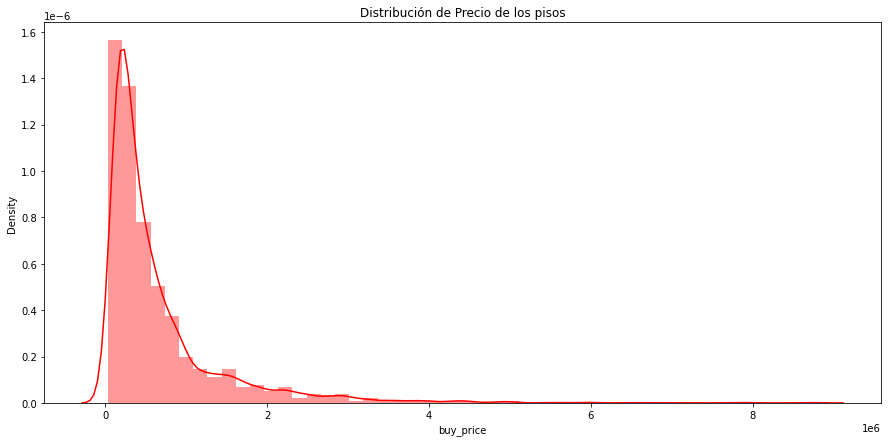

In [29]:
plt.figure(figsize=(15, 7))
sns.distplot(pisos["buy_price"], color="red")
plt.xlabel("buy_price")
plt.title("Distribución de Precio de los pisos")
print("Precio más bajo de piso en el Dataset: ", pisos["buy_price"].min())
plt.show()

In [30]:
#Limpeza de valores extremos
print("Antes de quitar extremos: ",pisos.shape)
index = pisos[(pisos['buy_price'] >= 1200000)|(pisos['buy_price'] <= 70000)].index
pisos.drop(index, inplace=True)
print("Despues de quitar extremos: " ,pisos.shape)

Antes de quitar extremos:  (21742, 23)
Despues de quitar extremos:  (18547, 23)


***Vamos a ver los tipos y numeros de valores que hay en cada columna.***

In [31]:
pisos.dtypes
for col in pisos:
    print(col)
    print(pisos[col].value_counts())
    print('')

sq_mt_built
70.0     494
60.0     479
80.0     427
65.0     377
90.0     357
        ... 
393.0      1
560.0      1
322.0      1
411.0      1
427.0      1
Name: sq_mt_built, Length: 406, dtype: int64

n_rooms
3     6769
2     5367
4     2615
1     2235
5      831
0      426
6      219
7       59
8       13
9        7
10       2
11       1
13       1
15       1
12       1
Name: n_rooms, dtype: int64

n_bathrooms
1.0     9016
2.0     7149
3.0     1720
4.0      371
5.0      210
6.0       53
7.0        8
8.0        3
9.0        2
13.0       1
Name: n_bathrooms, dtype: int64

floor
1                       4109
2                       3143
3                       2695
4                       2051
Bajo                    2036
5                       1106
6                        767
7                        484
8                        283
Entreplanta exterior     216
9                        147
Semi-sótano exterior      55
Semi-sótano interior      36
Entreplanta interior      32
Sótano int

***Vamos a ver como oscila el precio según la planta en la que esta situado el piso, cuanto mayor es la planta mayor es el precio,
los pisos de bajo, entresuelo y sótano son mas económicos.
Las casas y chalets aunque la mayoria estan en zonas bastante alejadas del centro de la ciudad son bastante caras, ya
que tiene muchos metros cuadrados.*** 

In [32]:
floory = pisos["floor"]
buy = pisos["buy_price"]

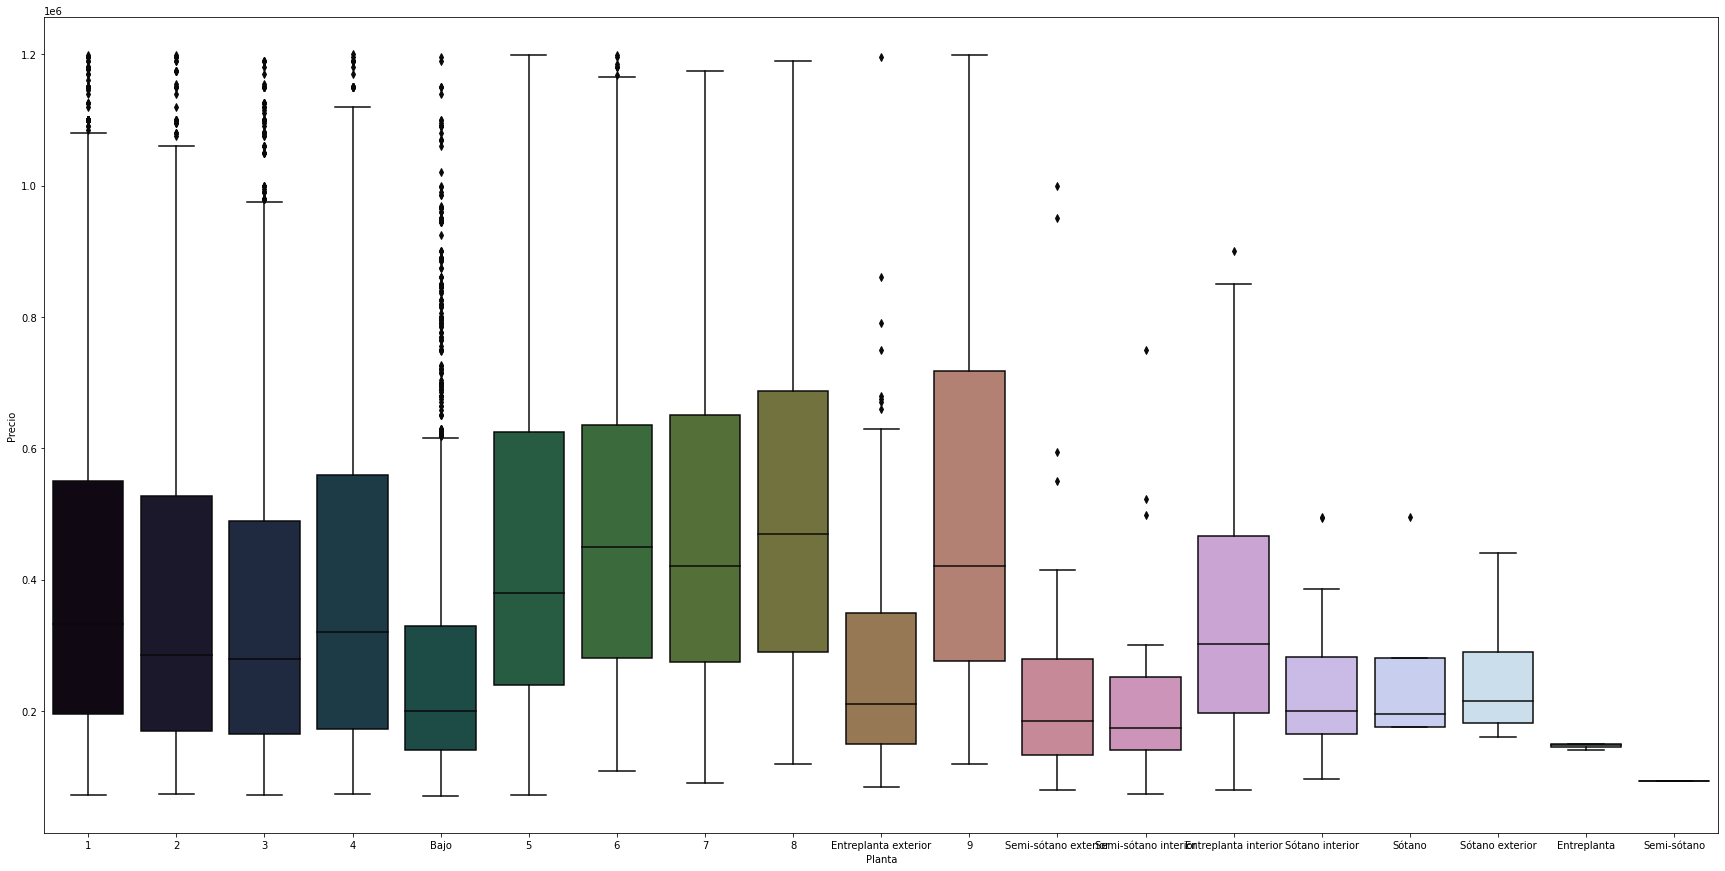

In [33]:
#Distribución precio, planta
plt.figure(figsize= (30,15))
sns.boxplot(x= floory, y= buy, data= pisos, palette= sns.color_palette("cubehelix", 19),
            order=["1", "2", "3", "4", "Bajo","5", "6", "7", "8", "Entreplanta exterior","9", "Semi-sótano exterior", "Semi-sótano interior", "Entreplanta interior", "Sótano interior","Sótano","Sótano exterior","Entreplanta","Semi-sótano"])
plt.xlabel("Planta")
plt.ylabel("Precio")
plt.show()

***Podemos ver como cuanto mas alta es la planta mas caro es el piso, los de mayor precio estan en planta 9 y los sótanos 
son los más economicos.

***Observando los valores de cada columna entiedo que hay varias columnas donde los valores NaN pueden ser perfectamente 'False', voy a ello.....***

In [34]:
varios=['has_ac','has_fitted_wardrobes','has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones']
for col in varios:
    pisos[col]=pisos[col].fillna(False)
pisos.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,operation,buy_price,house_type_id,is_renewal_needed,...,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,85000,HouseType 1: Pisos,False,...,False,False,True,False,False,False,False,False,False,False
21741,70.0,3,1.0,4,False,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,129900,HouseType 1: Pisos,True,...,True,True,True,False,False,True,False,False,False,False
21740,94.0,2,2.0,1,False,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,144247,HouseType 1: Pisos,False,...,True,True,True,False,False,False,False,True,False,False
21739,64.0,2,1.0,Bajo,True,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,109900,HouseType 1: Pisos,False,...,False,True,True,False,False,False,False,True,True,False
21738,108.0,2,2.0,4,False,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,260000,HouseType 1: Pisos,False,...,True,True,True,False,True,False,False,True,False,True


***Según el tipo decasa podemos ver que los áticos, chalets y los duplex son mas caros que los pisos.***

In [35]:
pisos['house_type_id']=pisos['house_type_id'].fillna("Otro")

In [36]:
tipocasa = pisos['house_type_id']

In [37]:
tipocasa.unique()

array(['HouseType 1: Pisos', 'HouseType 4: Dúplex', 'Otro',
       'HouseType 5: Áticos', 'HouseType 2: Casa o chalet'], dtype=object)

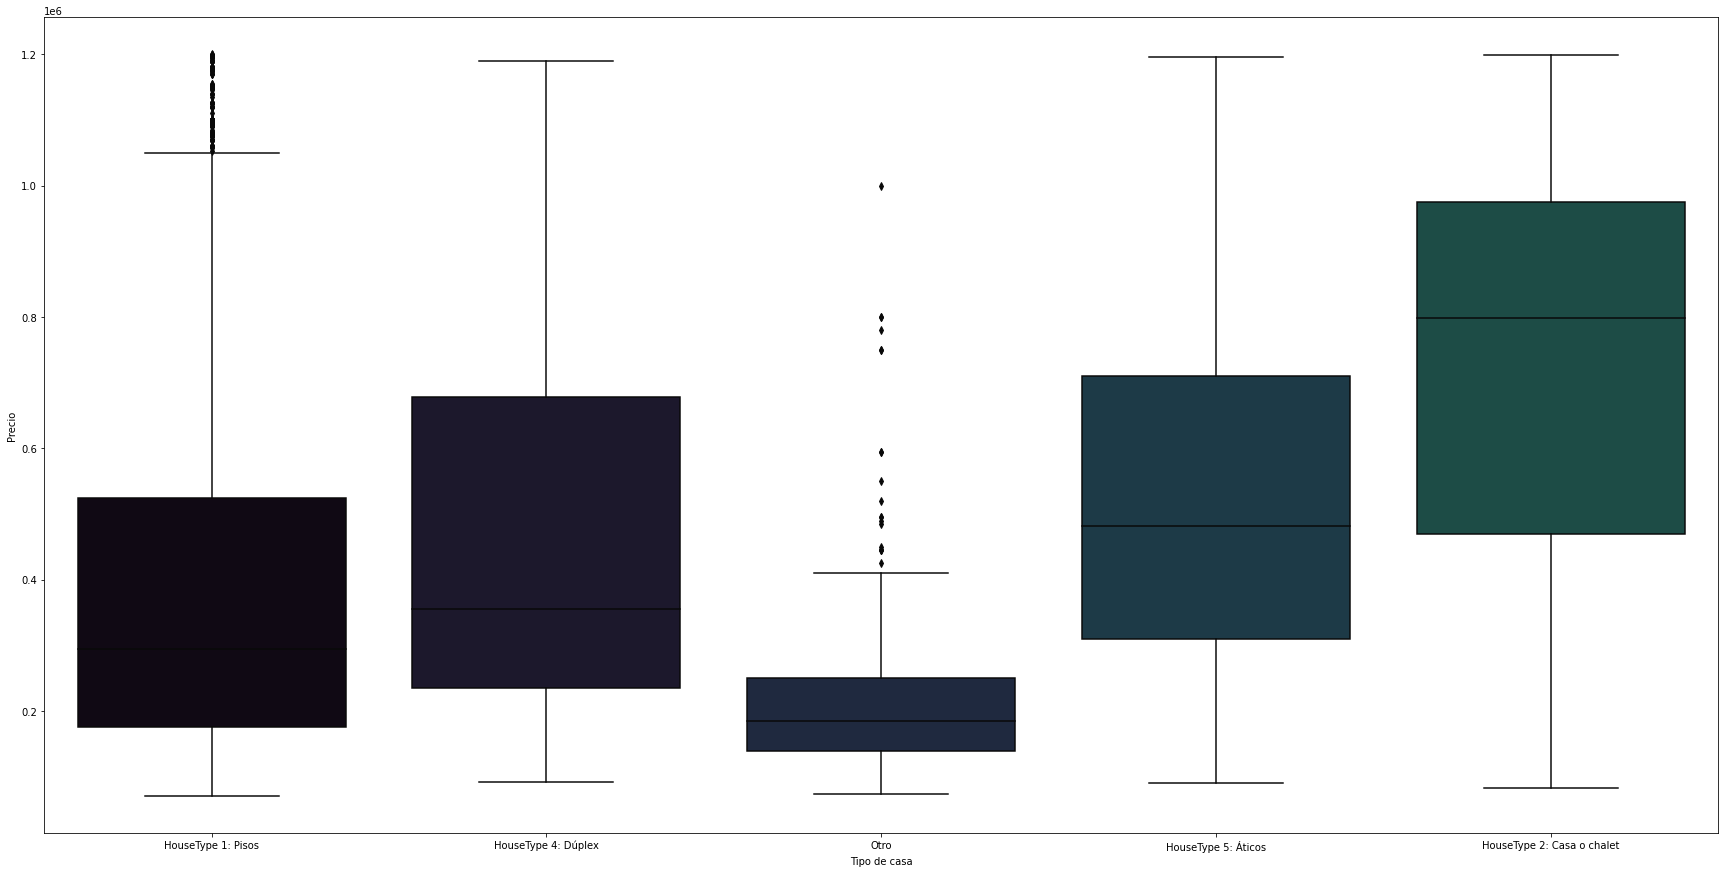

In [38]:
#Distribución tipo de casa, precio
plt.figure(figsize= (30,15))
sns.boxplot(x= tipocasa, y= buy, data= pisos, palette= sns.color_palette("cubehelix", 19),
            order=["HouseType 1: Pisos", "HouseType 4: Dúplex", "Otro","HouseType 5: Áticos", "HouseType 2: Casa o chalet"])
plt.xlabel("Tipo de casa")
plt.ylabel("Precio")
plt.show()            

***Vamos a crear una columna para cada tipo de casa para poder realizar mejor la predicción***

In [39]:
pisos=pd.get_dummies(pisos,columns=['house_type_id'])
#Es necesario borrar uno por lo que borraré le que he creado('Otro').
pisos.drop(columns='house_type_id_Otro', inplace=True)
pisos

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,operation,buy_price,is_renewal_needed,is_new_development,...,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,85000,False,False,...,False,False,False,False,False,False,1,0,0,0
21741,70.0,3,1.0,4,False,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,129900,True,False,...,False,True,False,False,False,False,1,0,0,0
21740,94.0,2,2.0,1,False,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,144247,False,False,...,False,False,False,True,False,False,1,0,0,0
21739,64.0,2,1.0,Bajo,True,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,109900,False,False,...,False,False,False,True,True,False,1,0,0,0
21738,108.0,2,2.0,4,False,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,260000,False,False,...,True,False,False,True,False,True,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,78.0,2,2.0,4,False,Neighborhood 10: Casco Histórico de Barajas (3...,sale,350000,False,False,...,False,False,False,True,False,False,0,0,0,1
4,96.0,2,2.0,3,False,Neighborhood 9: Campo de las Naciones-Corralej...,sale,425000,False,False,...,True,False,False,True,False,True,1,0,0,0
3,175.0,4,2.0,Bajo,True,Neighborhood 9: Campo de las Naciones-Corralej...,sale,680000,False,False,...,True,True,False,True,False,False,1,0,0,0


**Ahora voy a proceder a eliminar las filas donde los metros y numero de baños son nulos, ya que tiene mucha correlación con el precio y tiene muy pocos valores nulos, unas 100 filas. ***

In [40]:
pisos=pisos[pisos['sq_mt_built'].notna()]
pisos=pisos[pisos['n_bathrooms'].notna()]

In [41]:
pisos.shape

(18533, 26)

***Ahora vamos a centrarnos en la zona donde estan situados los pisos y los vamos a clasificar por distritos***

In [42]:
pisos['district_id']=pisos['neighborhood_id'].copy()
pisos.district_id=pisos.district_id.str.extract(r'(District \d+)')
pisos.neighborhood_id=pisos.neighborhood_id.str.extract(r'(Neighborhood \d+)')
pisos.district_id=pisos.district_id.str.extract(r'(\d+)')
pisos.neighborhood_id=pisos.neighborhood_id.str.extract(r'(\d+)')
pisos

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,neighborhood_id,operation,buy_price,is_renewal_needed,is_new_development,...,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,135,sale,85000,False,False,...,False,False,False,False,False,1,0,0,0,21
21741,70.0,3,1.0,4,False,132,sale,129900,True,False,...,True,False,False,False,False,1,0,0,0,21
21740,94.0,2,2.0,1,False,134,sale,144247,False,False,...,False,False,True,False,False,1,0,0,0,21
21739,64.0,2,1.0,Bajo,True,134,sale,109900,False,False,...,False,False,True,True,False,1,0,0,0,21
21738,108.0,2,2.0,4,False,133,sale,260000,False,False,...,False,False,True,False,True,1,0,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,78.0,2,2.0,4,False,10,sale,350000,False,False,...,False,False,True,False,False,0,0,0,1,2
4,96.0,2,2.0,3,False,9,sale,425000,False,False,...,False,False,True,False,True,1,0,0,0,2
3,175.0,4,2.0,Bajo,True,9,sale,680000,False,False,...,True,False,True,False,False,1,0,0,0,2


In [43]:
pisos.drop(columns='neighborhood_id', inplace=True)

In [44]:
pisos["district_id"].unique

<bound method Series.unique of id
21742    21
21741    21
21740    21
21739    21
21738    21
         ..
5         2
4         2
3         2
2         2
1         1
Name: district_id, Length: 18533, dtype: object>

***Por Distrito también encontramos diferencia en los precios de los inmuebles,el Distrito 11, Dsitrito 6, Distrito 5 y el Distrito 4
son los mas caros, mientras que el Distrito 12 y el Distrito 2 son bastante economicos.***

<AxesSubplot:xlabel='district_id', ylabel='count'>

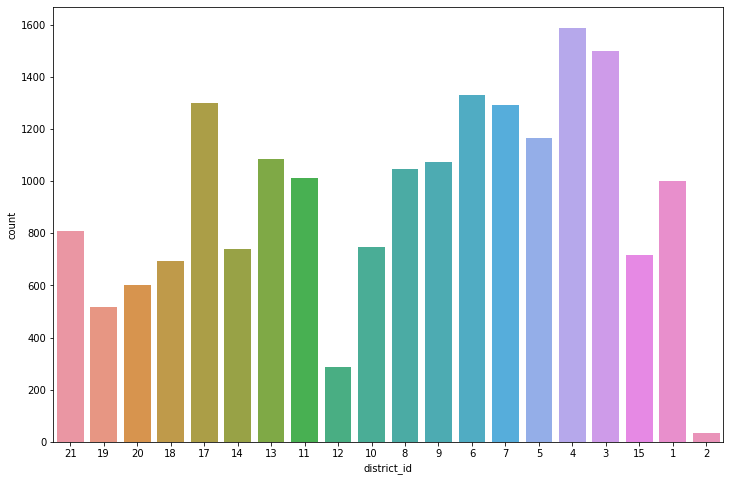

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(x='district_id', data=pisos)

In [46]:
distrito = pisos["district_id"]

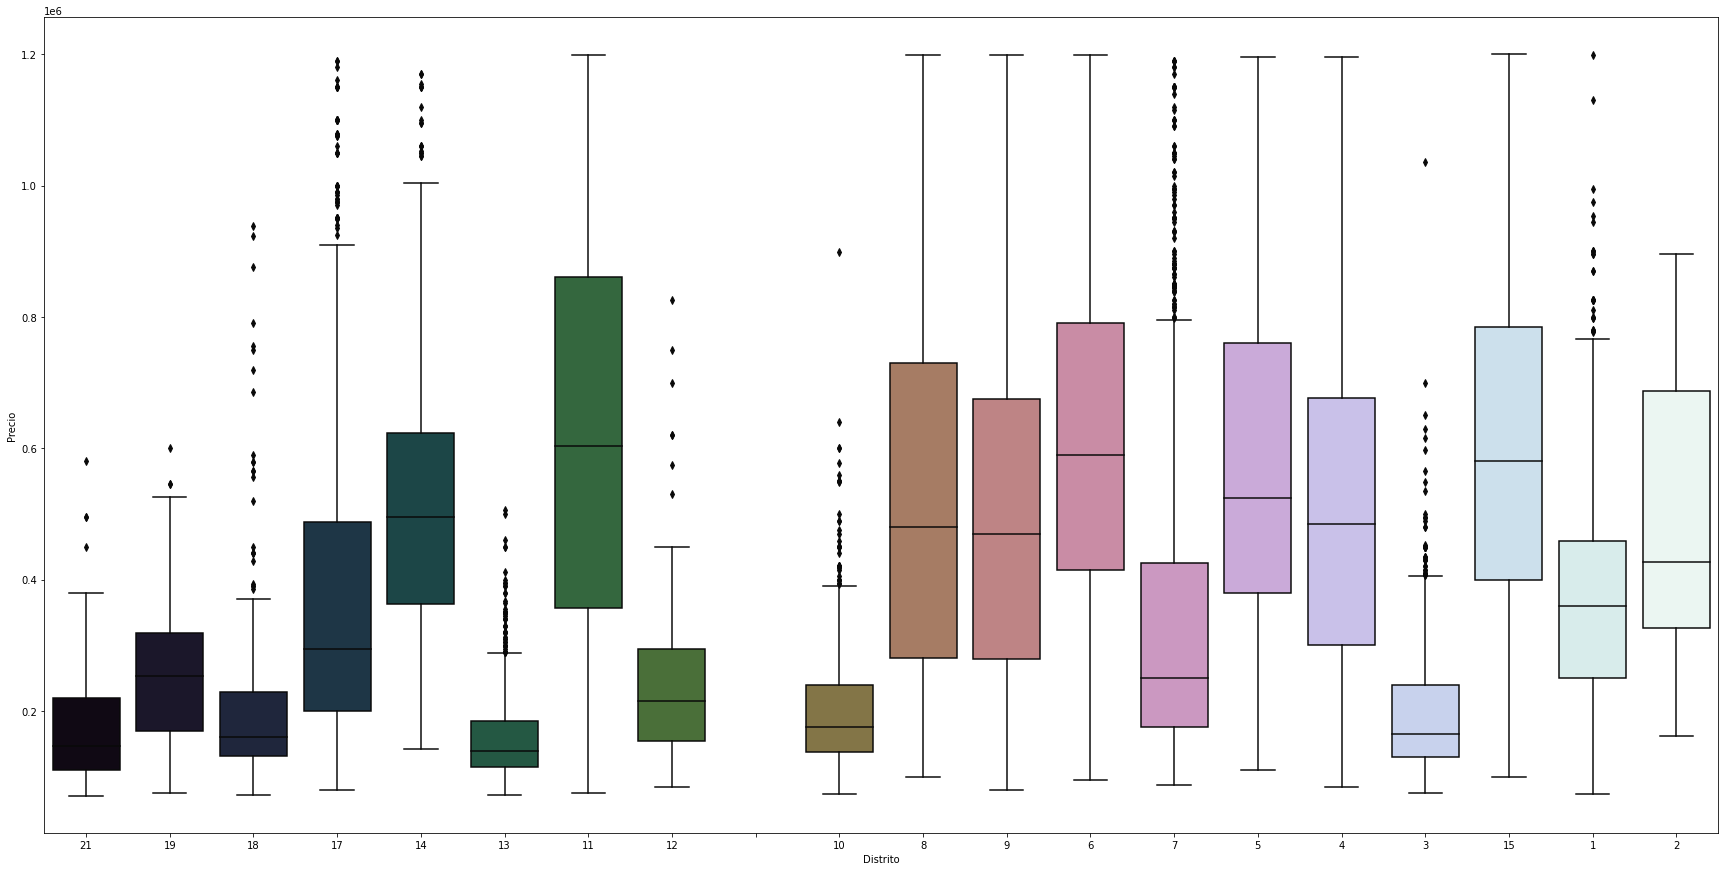

In [47]:
#Distribución tipo de casa, precio
plt.figure(figsize= (30,15))
sns.boxplot(x= distrito, y= buy, data= pisos, palette= sns.color_palette("cubehelix", 20),
            order=["21", "19", "18","17", "14","13", "11", "12","", "10","8", "9", "6","7", "5","4", "3", "15","1", "2"])
plt.xlabel("Distrito")
plt.ylabel("Precio")
plt.show()

***En el caso de la calefaccion individual la correlacion es negativa ya que si tiene suele ser electrica y es menos 
economico que tener calefacción central***

In [48]:
calefaccion_individual = pisos['has_individual_heating']

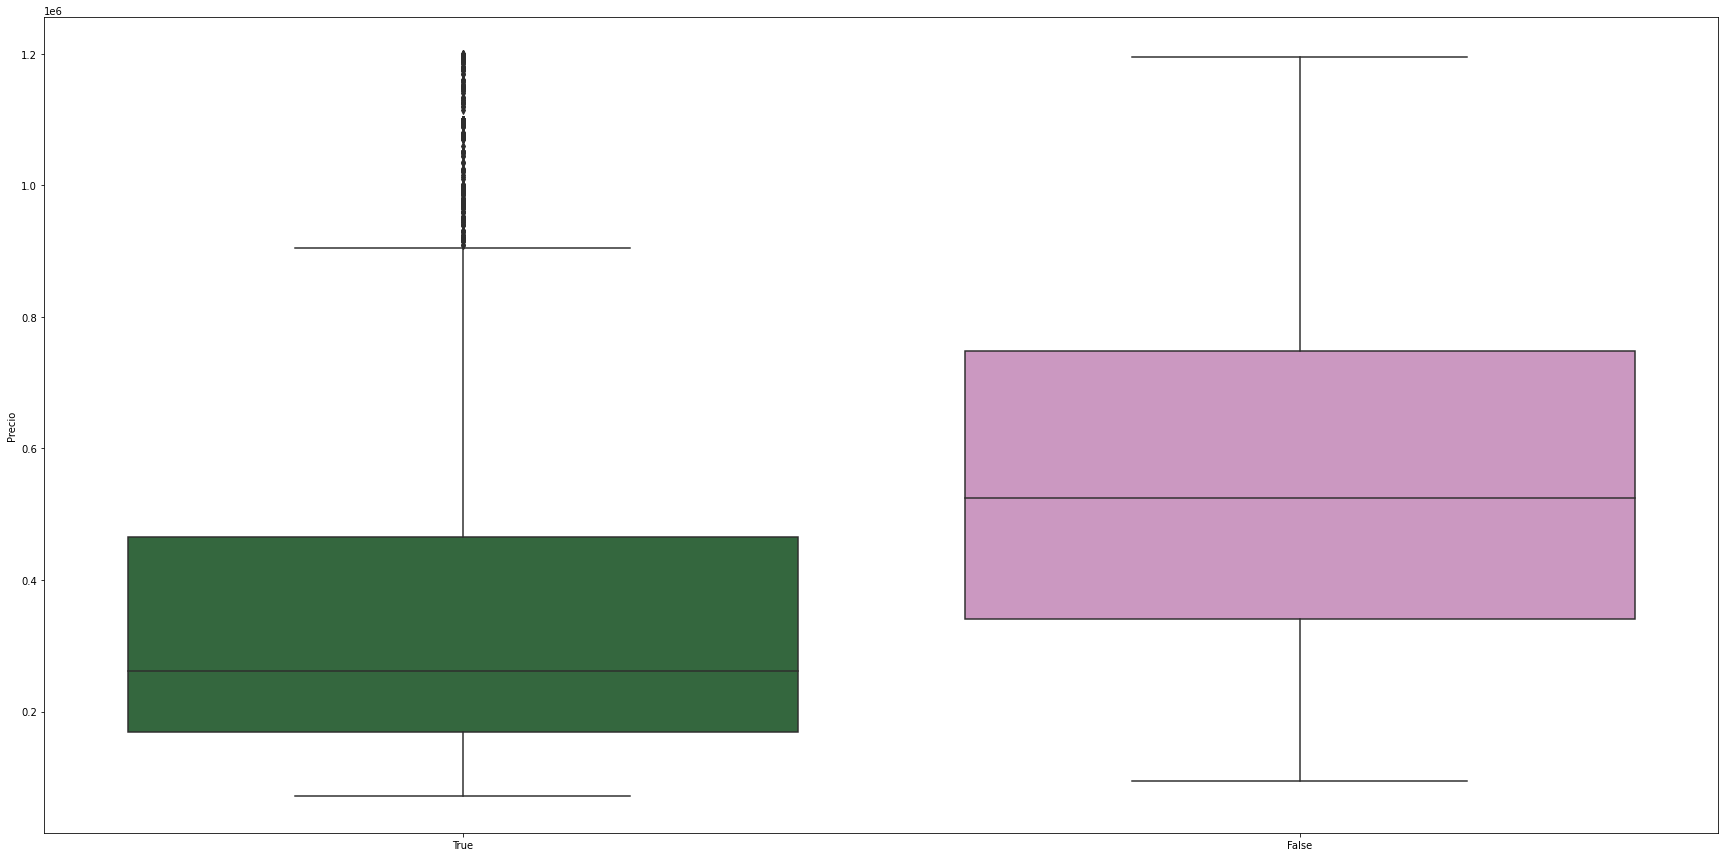

In [49]:
#Distribución calefaccion_individual , precio
plt.figure(figsize= (30,15))
sns.boxplot(x= calefaccion_individual, y= buy, data= pisos, palette= sns.color_palette("cubehelix", 2),
            order=[True,False])
plt.xlabel("")
plt.ylabel("Precio")
plt.show()

In [50]:
pisos['has_individual_heating']=pisos['has_individual_heating'].fillna("Misc")

In [51]:
pisos=pd.get_dummies(pisos,columns=['has_individual_heating'])
#Tengo que eliminar uno asi que eliminaré el que he creado.
pisos.drop(columns='has_individual_heating_Misc', inplace=True)
pisos

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,operation,buy_price,is_renewal_needed,is_new_development,has_ac,...,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id,has_individual_heating_False,has_individual_heating_True
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,sale,85000,False,False,True,...,False,False,False,1,0,0,0,21,0,0
21741,70.0,3,1.0,4,False,sale,129900,True,False,False,...,False,False,False,1,0,0,0,21,0,0
21740,94.0,2,2.0,1,False,sale,144247,False,False,False,...,True,False,False,1,0,0,0,21,0,1
21739,64.0,2,1.0,Bajo,True,sale,109900,False,False,False,...,True,True,False,1,0,0,0,21,0,0
21738,108.0,2,2.0,4,False,sale,260000,False,False,True,...,True,False,True,1,0,0,0,21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,78.0,2,2.0,4,False,sale,350000,False,False,True,...,True,False,False,0,0,0,1,2,0,1
4,96.0,2,2.0,3,False,sale,425000,False,False,True,...,True,False,True,1,0,0,0,2,0,1
3,175.0,4,2.0,Bajo,True,sale,680000,False,False,True,...,True,False,False,1,0,0,0,2,0,1


In [52]:
pisos.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,operation,buy_price,is_renewal_needed,is_new_development,has_ac,...,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id,has_individual_heating_False,has_individual_heating_True
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3,False,sale,85000,False,False,True,...,False,False,False,1,0,0,0,21,0,0
21741,70.0,3,1.0,4,False,sale,129900,True,False,False,...,False,False,False,1,0,0,0,21,0,0
21740,94.0,2,2.0,1,False,sale,144247,False,False,False,...,True,False,False,1,0,0,0,21,0,1
21739,64.0,2,1.0,Bajo,True,sale,109900,False,False,False,...,True,True,False,1,0,0,0,21,0,0
21738,108.0,2,2.0,4,False,sale,260000,False,False,True,...,True,False,True,1,0,0,0,21,0,0


In [53]:
pisos.corr()['buy_price'].sort_values(ascending=False)

buy_price                                   1.000000
sq_mt_built                                 0.753308
n_bathrooms                                 0.716333
n_rooms                                     0.502029
has_individual_heating_False                0.274234
has_garden                                  0.268557
house_type_id_HouseType 2: Casa o chalet    0.255170
has_pool                                    0.246459
has_storage_room                            0.233889
has_fitted_wardrobes                        0.196342
has_ac                                      0.184990
has_balcony                                 0.133061
has_green_zones                             0.118825
house_type_id_HouseType 5: Áticos           0.112265
has_terrace                                 0.085286
is_accessible                               0.073737
house_type_id_HouseType 4: Dúplex           0.038861
is_renewal_needed                           0.029889
has_individual_heating_True                -0.

In [54]:
pisos.drop(columns= ['operation','has_individual_heating_False','has_individual_heating_True'], inplace=True)                           


***Vamos a hacer numerica la columna de plantas para poder hcer la predicción.

In [55]:
pisos['floor']=pisos['floor'].fillna("otro")

In [56]:
print(pisos['floor'].unique())

['3' '4' '1' 'Bajo' '2' 'otro' '7' '6' 'Semi-sótano' '5'
 'Entreplanta exterior' '8' '9' 'Entreplanta interior' 'Entreplanta'
 'Semi-sótano exterior' 'Sótano interior' 'Semi-sótano interior' 'Sótano'
 'Sótano exterior']


In [57]:
pisos["floor"]= pisos["floor"].map({"1":1, "2":2, "3":3, "4":4, "Bajo":0,"5":5, "6":6, "7":7, "8":8, "Entreplanta exterior":50,"9":9, "Semi-sótano exterior":25, "Semi-sótano interior":15, "Entreplanta interior":10, "Sótano interior":11,"Sótano":666,"Sótano exterior":35,"Entreplanta":45,"Semi-sótano":66})

In [58]:
pisos.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,buy_price,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,...,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3.0,False,85000,False,False,True,False,...,False,False,False,False,False,1,0,0,0,21
21741,70.0,3,1.0,4.0,False,129900,True,False,False,True,...,True,False,False,False,False,1,0,0,0,21
21740,94.0,2,2.0,1.0,False,144247,False,False,False,True,...,False,False,True,False,False,1,0,0,0,21
21739,64.0,2,1.0,0.0,True,109900,False,False,False,False,...,False,False,True,True,False,1,0,0,0,21
21738,108.0,2,2.0,4.0,False,260000,False,False,True,True,...,False,False,True,False,True,1,0,0,0,21


***Quiero observar las columnas que tenian solo el valor True y he sustituido por False todos los valores vacios*** 

***Son las siguientes: 'has_ac','has_fitted_wardrobes','has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones'.***

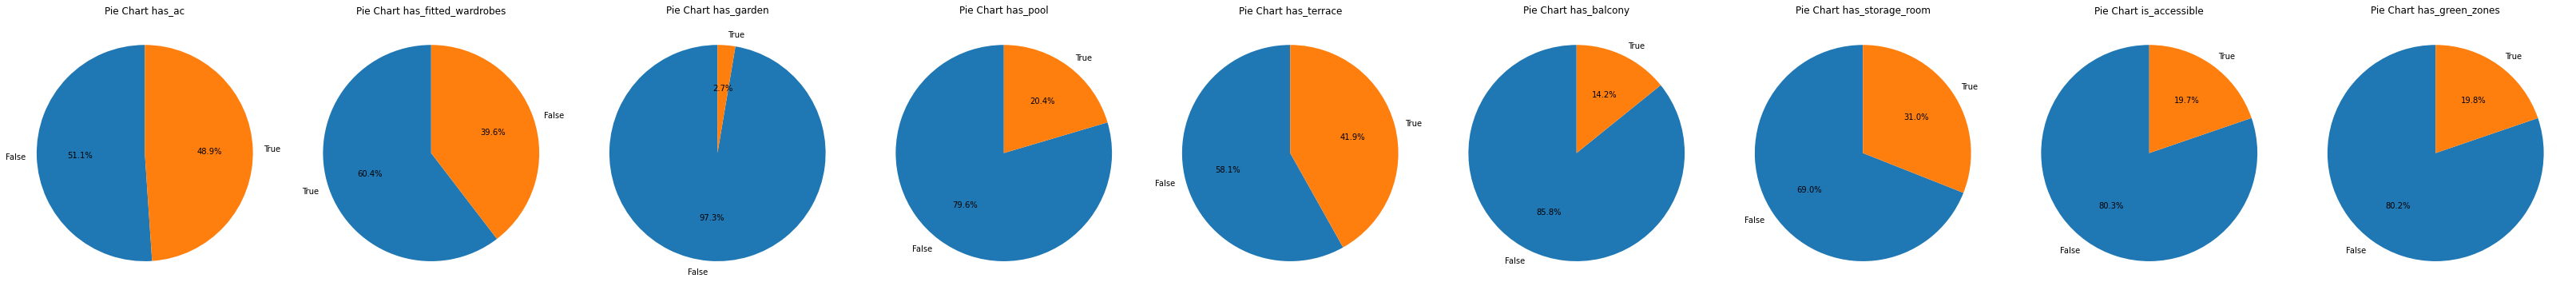

In [59]:
columns_to_plot = ['has_ac','has_fitted_wardrobes','has_garden','has_pool','has_terrace','has_balcony','has_storage_room','is_accessible','has_green_zones']

# Configuración de los subplots
num_plots = len(columns_to_plot)
num_rows = 1
num_cols = num_plots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))

# Iterar sobre las columnas y crear los pie charts
for i, column in enumerate(columns_to_plot):
    # Obtener los datos de la columna
    data = pisos[column].value_counts()
    
    # Crear el gráfico de pie
    axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Pie Chart {column}')

# Ajuste de diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [60]:
pisos.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,buy_price,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,...,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3.0,False,85000,False,False,True,False,...,False,False,False,False,False,1,0,0,0,21
21741,70.0,3,1.0,4.0,False,129900,True,False,False,True,...,True,False,False,False,False,1,0,0,0,21
21740,94.0,2,2.0,1.0,False,144247,False,False,False,True,...,False,False,True,False,False,1,0,0,0,21
21739,64.0,2,1.0,0.0,True,109900,False,False,False,False,...,False,False,True,True,False,1,0,0,0,21
21738,108.0,2,2.0,4.0,False,260000,False,False,True,True,...,False,False,True,False,True,1,0,0,0,21


In [61]:
pisos['has_lift']=pd.to_numeric(pisos['has_lift'],errors='coerce')

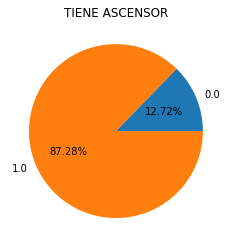

In [62]:
floor_under = pisos.groupby(['has_lift']).sum()


names = floor_under.index
values = floor_under['buy_price']
plt.title('TIENE ASCENSOR')
plt.pie(values,labels=names,autopct='%.2f%%')
plt.show()

In [63]:
pisos['is_exterior']=pd.to_numeric(pisos['is_exterior'],errors='coerce')

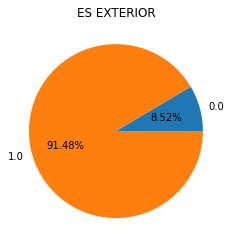

In [64]:
floor_under = pisos.groupby(['is_exterior']).sum()


names = floor_under.index
values = floor_under['buy_price']
plt.title('ES EXTERIOR')
plt.pie(values,labels=names,autopct='%.2f%%')
plt.show()

In [65]:
pisos['is_floor_under']=pisos['is_floor_under'].fillna("Misc")

In [66]:
pisos=pd.get_dummies(pisos,columns=['is_floor_under'])
#Need to drop one, so why not drop the one I created
pisos.drop(columns='is_floor_under_Misc', inplace=True)
pisos


,sq_mt_built,n_rooms,n_bathrooms,floor,buy_price,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,has_lift,...,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id,is_floor_under_False,is_floor_under_True
id,,,,,,,,,,,,,,,,,,,,,
21742,64.0,2,1.0,3.0,85000,False,False,True,False,0.0,...,False,False,False,1,0,0,0,21,1,0
21741,70.0,3,1.0,4.0,129900,True,False,False,True,1.0,...,False,False,False,1,0,0,0,21,1,0
21740,94.0,2,2.0,1.0,144247,False,False,False,True,1.0,...,True,False,False,1,0,0,0,21,1,0
21739,64.0,2,1.0,0.0,109900,False,False,False,False,1.0,...,True,True,False,1,0,0,0,21,0,1
21738,108.0,2,2.0,4.0,260000,False,False,True,True,1.0,...,True,False,True,1,0,0,0,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,78.0,2,2.0,4.0,350000,False,False,True,True,1.0,...,True,False,False,0,0,0,1,2,1,0
4,96.0,2,2.0,3.0,425000,False,False,True,True,1.0,...,True,False,True,1,0,0,0,2,1,0
3,175.0,4,2.0,0.0,680000,False,False,True,True,0.0,...,True,False,False,1,0,0,0,2,0,1


In [67]:
pisos.dtypes

sq_mt_built                                 float64
n_rooms                                       int64
n_bathrooms                                 float64
floor                                       float64
buy_price                                     int64
is_renewal_needed                              bool
is_new_development                           object
has_ac                                         bool
has_fitted_wardrobes                           bool
has_lift                                    float64
is_exterior                                 float64
has_garden                                     bool
has_pool                                       bool
has_terrace                                    bool
has_balcony                                    bool
has_storage_room                               bool
is_accessible                                  bool
has_green_zones                                bool
house_type_id_HouseType 1: Pisos              uint8
house_type_i

In [68]:
pisos.isnull().sum()

sq_mt_built                                    0
n_rooms                                        0
n_bathrooms                                    0
floor                                       1350
buy_price                                      0
is_renewal_needed                              0
is_new_development                           905
has_ac                                         0
has_fitted_wardrobes                           0
has_lift                                    1158
is_exterior                                 1790
has_garden                                     0
has_pool                                       0
has_terrace                                    0
has_balcony                                    0
has_storage_room                               0
is_accessible                                  0
has_green_zones                                0
house_type_id_HouseType 1: Pisos               0
house_type_id_HouseType 2: Casa o chalet       0
house_type_id_HouseT

***VOY A RELLENAR LOS VALORES NULOS DE ESTAS COLUMNAS POR LA MODA, SON MUY POCOS DATOS LOS QUE HAY VACIOS.***

In [69]:
comode=pisos['is_new_development'].mode()[0]
pisos['is_new_development']=pisos['is_new_development'].fillna(comode)

In [70]:
marca=(pisos['has_lift'].isnull()) & (pisos['house_type_id_HouseType 2: Casa o chalet']==0)
lifmode=pisos['has_lift'].mode()[0]
pisos['has_lift'][marca]=lifmode
print(pisos['has_lift'].value_counts())

1.0    13418
0.0     4389
Name: has_lift, dtype: int64


In [71]:
marca=(pisos['is_exterior'].isnull()) & (pisos['house_type_id_HouseType 2: Casa o chalet']==0)
exmode=pisos['is_exterior'].mode()[0]
pisos['is_exterior'][marca]=exmode
print(pisos['is_exterior'].value_counts())

1.0    16071
0.0     1736
Name: is_exterior, dtype: int64


In [72]:
flomode=pisos['floor'].mode()[0]
pisos['floor']=pisos['floor'].fillna(flomode)

In [73]:
total = pisos.isnull().sum()

In [74]:
pisos['has_lift']=pd.to_numeric(pisos['has_lift'],errors='coerce')
pisos['is_exterior']=pd.to_numeric(pisos['is_exterior'],errors='coerce')


In [75]:
X = pisos.drop(columns=['buy_price'])
X = X.astype('category')

In [76]:
# label encoder
from sklearn.preprocessing import LabelEncoder
X=X.apply(LabelEncoder().fit_transform)

In [77]:
X

,sq_mt_built,n_rooms,n_bathrooms,floor,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,has_lift,is_exterior,...,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id,is_floor_under_False,is_floor_under_True
id,,,,,,,,,,,,,,,,,,,,,
21742,48,2,0,3,0,0,1,0,0,1,...,0,0,0,1,0,0,0,12,1,0
21741,54,3,0,4,1,0,0,1,1,1,...,0,0,0,1,0,0,0,12,1,0
21740,78,2,1,1,0,0,0,1,1,1,...,1,0,0,1,0,0,0,12,1,0
21739,48,2,0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,0,12,0,1
21738,92,2,1,4,0,0,1,1,1,1,...,1,0,1,1,0,0,0,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,62,2,1,4,0,0,1,1,1,1,...,1,0,0,0,0,0,1,10,1,0
4,80,2,1,3,0,0,1,1,1,1,...,1,0,1,1,0,0,0,10,1,0
3,159,4,1,0,0,0,1,1,0,1,...,1,0,0,1,0,0,0,10,0,1


In [78]:
y= pisos['buy_price']

In [79]:
X.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_renewal_needed,is_new_development,has_ac,has_fitted_wardrobes,has_lift,is_exterior,...,has_storage_room,is_accessible,has_green_zones,house_type_id_HouseType 1: Pisos,house_type_id_HouseType 2: Casa o chalet,house_type_id_HouseType 4: Dúplex,house_type_id_HouseType 5: Áticos,district_id,is_floor_under_False,is_floor_under_True
id,,,,,,,,,,,,,,,,,,,,,
21742,48,2,0,3,0,0,1,0,0,1,...,0,0,0,1,0,0,0,12,1,0
21741,54,3,0,4,1,0,0,1,1,1,...,0,0,0,1,0,0,0,12,1,0
21740,78,2,1,1,0,0,0,1,1,1,...,1,0,0,1,0,0,0,12,1,0
21739,48,2,0,0,0,0,0,0,1,1,...,1,1,0,1,0,0,0,12,0,1
21738,92,2,1,4,0,0,1,1,1,1,...,1,0,1,1,0,0,0,12,1,0


In [80]:
y

id
21742     85000
21741    129900
21740    144247
21739    109900
21738    260000
          ...  
5        350000
4        425000
3        680000
2        695000
1        424000
Name: buy_price, Length: 18533, dtype: int64

In [81]:
pisos.isnull().sum()

sq_mt_built                                   0
n_rooms                                       0
n_bathrooms                                   0
floor                                         0
buy_price                                     0
is_renewal_needed                             0
is_new_development                            0
has_ac                                        0
has_fitted_wardrobes                          0
has_lift                                    726
is_exterior                                 726
has_garden                                    0
has_pool                                      0
has_terrace                                   0
has_balcony                                   0
has_storage_room                              0
is_accessible                                 0
has_green_zones                               0
house_type_id_HouseType 1: Pisos              0
house_type_id_HouseType 2: Casa o chalet      0
house_type_id_HouseType 4: Dúplex       

***VAMOS A VER EN GRÁFICO LAS COLUMNAS QUE TENEMOS***

array([[<AxesSubplot:title={'center':'sq_mt_built'}>,
        <AxesSubplot:title={'center':'n_rooms'}>,
        <AxesSubplot:title={'center':'n_bathrooms'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'buy_price'}>,
        <AxesSubplot:title={'center':'has_lift'}>,
        <AxesSubplot:title={'center':'is_exterior'}>,
        <AxesSubplot:title={'center':'house_type_id_HouseType 1: Pisos'}>],
       [<AxesSubplot:title={'center':'house_type_id_HouseType 2: Casa o chalet'}>,
        <AxesSubplot:title={'center':'house_type_id_HouseType 4: Dúplex'}>,
        <AxesSubplot:title={'center':'house_type_id_HouseType 5: Áticos'}>,
        <AxesSubplot:title={'center':'is_floor_under_False'}>],
       [<AxesSubplot:title={'center':'is_floor_under_True'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

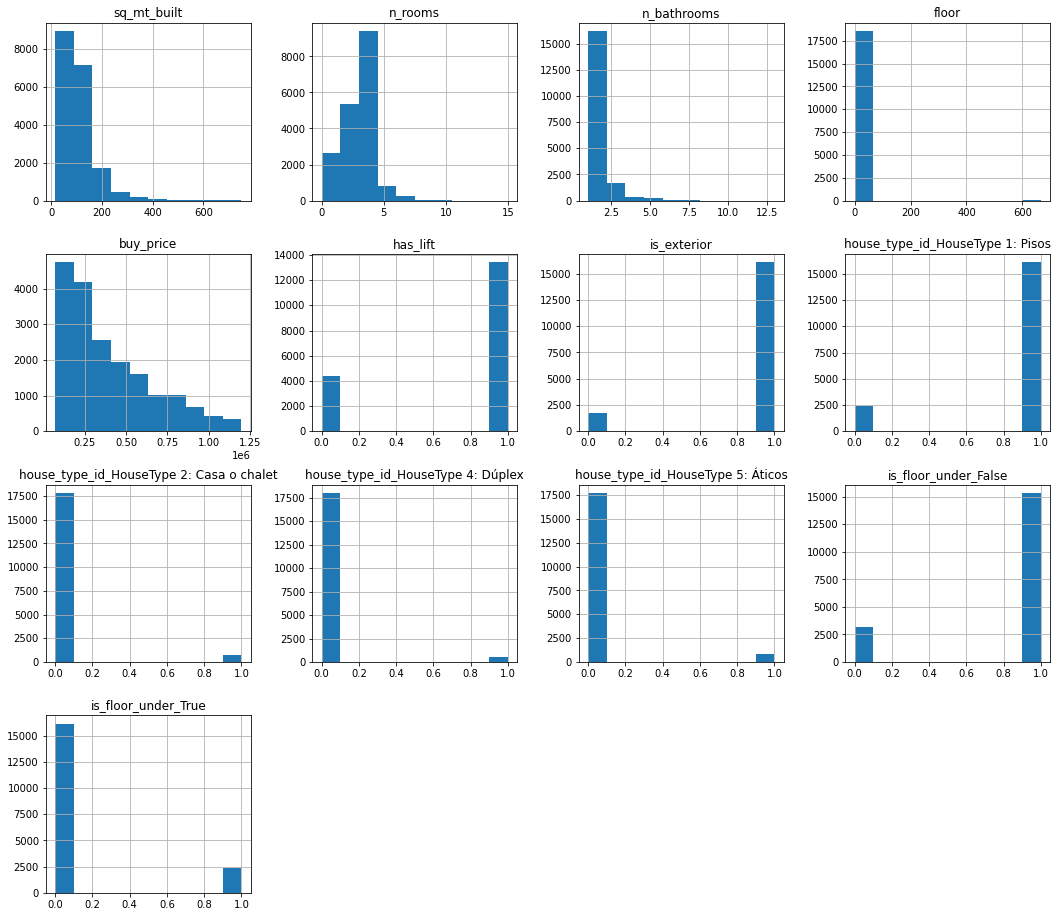

In [82]:
pisos.hist(figsize = (18,16))

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=66, test_size=0.2)

# Escalo los datos

***El escalado de datos se refiere al proceso de transformar las variables numéricas de entrada para que estén en una escala similar.
El escalado de datos es esencialmente necesario por dos razones principales:
a. Para evitar el dominio de una característica sobre otras.
b. Para acelerar el proceso de convergencia.***

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# REALIZO LA PCA

***El PCA es una técnica de reducción de dimensionalidad que se utiliza para comprimir la información contenida en un conjunto de datos con muchas características en un conjunto de datos con menos características, conocidas como componentes principales. La idea detrás del PCA es transformar las variables originales en un nuevo conjunto de variables no correlacionadas llamadas componentes principales.
El PCA tiene varios propósitos importantes:
a. Reducción de la dimensionalidad mientras se retiene la mayor cantidad posible de información relevante.
b. Eliminación de la multicolinealidad (alta correlación).
c. Reducción del ruido  y mantener la información más importante.
d. Visualización de datos***


In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

***En resumen, el escalado de datos y el PCA son técnicas clave para mejorar la calidad de los datos y reducir la dimensionalidad en el análisis de machine learning. Estas prácticas ayudan a los modelos a converger más rápido, reducir el riesgo de dominio de una característica, eliminar la multicolinealidad y mejorar la interpretación de los datos.***

In [87]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Lineal Regresión Multiple

In [88]:
lr_multiple = linear_model.LinearRegression()

In [89]:
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred = lr_multiple.predict(X_test)
y_pred

array([429124.77153771, 200452.8467383 , 321113.20927017, ...,
       596595.42280654, 304911.80734746, 447530.89544846])

In [91]:
y_test

id
17454    435000
1034     139000
5884     225000
21115    165000
8911     155000
          ...  
3189     229000
5085      98000
16616    450000
18632    260000
17288    310000
Name: buy_price, Length: 3707, dtype: int64

In [92]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 79054.14591458 -23354.65165587]
Valor de la intersección o coeficiente "b":
395433.8194388237


In [93]:
print("Precisión del modelo:")
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.4251105108044303


In [94]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

predas = lr_multiple.predict(X_test)
mae = mean_absolute_error(y_test, predas)
rmse = np.sqrt(mean_squared_error(y_test, predas))
print("MAE: %f"  % (mae))
print("RMSE: %f" % (rmse))
print(explained_variance_score(predas,y_test))

MAE: 159022.066964
RMSE: 203195.501276
-0.43310571336973


# XGB REGRESOR

In [95]:
from numpy import asarray
#import xgboost as xgb
from xgboost import XGBRegressor
model = XGBRegressor()
# fit model
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
solucion3=[model.score(X,y)]

solucion3

[0.9474494414930673]

In [97]:
model.fit(X_train,y_train)
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("MAE: %f"  % (mae))
print("RMSE: %f" % (rmse))
print(explained_variance_score(preds,y_test))

MAE: 129146.834096
RMSE: 174188.521391
0.30699661588910887


In [98]:
#Implementación de algoritmo de árboles de decisión XGBoost, personalizando variables.
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

data_dmatrix = xgb.DMatrix(data=X,label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          eta = 0.3,
                          min_child_weight = 1,
                          gamma = 0.1018506246381371,
                          colsample_bytree = 0.8629698417369874, 
                          learning_rate = 0.06164827794908118, 
                          max_depth = 5, 
                          alpha = 8.072986901537691, 
                          n_estimators = 127,
                          subsample= 0.6873761748867334)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("MAE: %f"  % (mae))
print("RMSE: %f" % (rmse))
print(explained_variance_score(preds,y_test))

[12:17:07] WARNING: /Users/javier/xgboost-1.4.2/build/temp.macosx-10.9-x86_64-3.8/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 58282.900776
RMSE: 87439.762166
0.8741635520785636


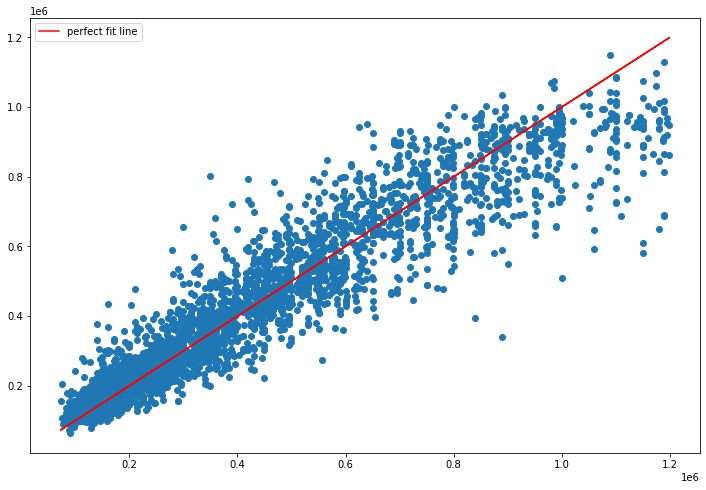

In [99]:
plt.figure(figsize=(12,8))

# Our predictions
plt.scatter(y_test, preds);

# Perfect predictions
plt.plot(y_test, y_test, color='r', label='perfect fit line')
plt.legend();

# ***EL QUE MEJOR RESULTADO DA ES EL XGB REGRESOR = 94,7%***

***PRIMERO VAMOS A VER EL PRECIO DE UNA VIVIENDA DE 60 METROS, 2 HABITACIONES, PLANTA 9 y EN EL DISTRITO MAS CARO, EL 5.***

In [100]:

prueba11 = [60, 2, 1, 9, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 5, 0, 1]
new_data = asarray([prueba11])
# make a prediction
yhat = xg_reg.predict(new_data)
# summarize prediction
print('Precio de vivienda: %.2f euros' % yhat)

Precio de vivienda: 446265.69 euros


***LUEGO VAMOS A VER EL PRECIO DE UNA VIVIENDA DE 60 METROS, 2 HABITACIONES, PLANTA BAJA y EN EL DISTRITO MAS BARATO, EL 12.***

In [101]:

prueba22 = [60, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 12, 1, 0]
new_data = asarray([prueba22])
# make a prediction
yhat = xg_reg.predict(new_data)
# summarize prediction
print('Precio de vivienda: %.2f euros' % yhat)

Precio de vivienda: 228871.34 euros


***AHORA VAMOS A VER EL PRECIO DE UNA VIVIENDA DE 60 METROS, 2 HABITACIONES, PLANTA BAJA y EN EL DISTRITO MAS CARO, EL 5.***

In [102]:
prueba33 = [60, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 5, 0, 1]
new_data = asarray([prueba33])
# make a prediction
yhat = xg_reg.predict(new_data)
# summarize prediction
print('Precio de vivienda: %.2f euros' % yhat)

Precio de vivienda: 400451.94 euros


***FINALMENTE VAMOS A VER EL PRECIO DE UNA VIVIENDA DE 60 METROS, 2 HABITACIONES, PLANTA 9 y EN EL DISTRITO MAS BARATO, EL 12.***

In [103]:
prueba44 = [60, 2, 1, 9, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 12, 1, 0]
new_data = asarray([prueba44])
# make a prediction
yhat = xg_reg.predict(new_data)
# summarize prediction
print('Precio de vivienda: %.2f euros' % yhat)

Precio de vivienda: 238724.81 euros


# Support Vector Machine (SVM)

In [104]:
from sklearn.svm import SVR

In [105]:
svr = SVR(kernel="linear", C=1.0, epsilon=0.2)

In [106]:
svr.fit(X_train, y_train)

SVR(epsilon=0.2, kernel='linear')

In [107]:
solucion_4=[svr.intercept_,svr.coef_,svr.score(X,y)]

solucion_4

[array([11298.90626621]),
 array([[ 3745.38085811, -1796.11315902,  1337.22773036,  1120.44006712,
           -68.56861973,    42.        ,   987.56826274,   830.999643  ,
          1363.22808735, -1140.        ,  -238.        ,   333.79635009,
         -1117.56861973,   449.        ,   151.22773036,   392.79635009,
           114.79635009,    52.        ,  -368.        ,   -48.        ,
           260.        ,  2555.47754949,   554.22808735,  -404.22808735]]),
 0.6017960735711003]

In [108]:
print("DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN")
print()
print("Precisión del modelo:")
print(svr.score(X_train, y_train))

DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN

Precisión del modelo:
0.5980013976671129


In [109]:
predv = svr.predict(X_test)
mae = mean_absolute_error(y_test, predv)
rmse = np.sqrt(mean_squared_error(y_test, predv))
print("MAE: %f"  % (mae))
print("RMSE: %f" % (rmse))
print(explained_variance_score(predv,y_test))

MAE: 122197.909484
RMSE: 165457.199819
0.4835103884616324


# Decission Tree Regression

In [110]:
from sklearn.tree import DecisionTreeRegressor
adr = DecisionTreeRegressor(max_depth=5)

In [111]:
adr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [112]:
y_pred = adr.predict(X_test)
y_pred

array([364673.7655642 , 133283.38599641, 364673.7655642 , ...,
       207240.77137429, 133283.38599641, 207240.77137429])

In [113]:
y_test

id
15742    259000
21456     89000
18830    299000
12951    245000
20794    323000
          ...  
19746    110000
11169    450000
664      227000
5415     138000
16665    175000
Name: buy_price, Length: 3707, dtype: int64

In [114]:
print("Datos del Modelo de árboles de decision Regresión")
print()
print("Precisión del modelo:")
print(adr.score(X_train, y_train))

Datos del Modelo de árboles de decision Regresión

Precisión del modelo:
0.783135269891094


In [115]:
predtree = adr.predict(X_test)
mae = mean_absolute_error(y_test, predtree)
rmse = np.sqrt(mean_squared_error(y_test, predtree))
print("MAE: %f"  % (mae))
print("RMSE: %f" % (rmse))
print(explained_variance_score(predtree,y_test))

MAE: 86364.220311
RMSE: 121129.302580
0.7344289675371349


# Regresión Líneal Polinomial

In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
poli_reg = PolynomialFeatures(degree= 2)

In [118]:
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

In [119]:
pr = linear_model.LinearRegression()

In [120]:
pr.fit(X_train_poli, y_train)

LinearRegression()

In [121]:
y_pred = pr.predict(X_test_poli)
y_pred

array([252018.74618954, 140049.26568353, 228951.83347219, ...,
       248596.44083875, 177157.63955018, 338681.37653084])

In [122]:
y_test

id
15742    259000
21456     89000
18830    299000
12951    245000
20794    323000
          ...  
19746    110000
11169    450000
664      227000
5415     138000
16665    175000
Name: buy_price, Length: 3707, dtype: int64

In [123]:
print("Datos del modelo Regresion Lineal Polinomial")
print()
print("Precisión del modelo: ")
print(pr.score(X_train_poli, y_train))

Datos del modelo Regresion Lineal Polinomial

Precisión del modelo: 
0.7767338721083222


# Random Forest Regression

In [124]:
from sklearn.ensemble import RandomForestRegressor
bar = RandomForestRegressor(n_estimators=300, max_depth=8)

In [125]:
bar.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=300)

In [126]:
y_pred = bar.predict(X_test)
y_pred

array([244038.40991524, 120639.74403694, 275483.64687429, ...,
       292546.05690805, 142533.63569757, 169416.17488382])

In [127]:
y_test

id
15742    259000
21456     89000
18830    299000
12951    245000
20794    323000
          ...  
19746    110000
11169    450000
664      227000
5415     138000
16665    175000
Name: buy_price, Length: 3707, dtype: int64

In [128]:
#Implementación de algoritmo Bosques Aleatorios Regresión
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [129]:
print("Datos del modelo Bosques Aleatorios Regresión")
print()
print("Precisión del modelo: ")
print(bar.score(X_train, y_train))

Datos del modelo Bosques Aleatorios Regresión

Precisión del modelo: 
0.8924148933040136


In [130]:
predis = bar.predict(X_test)
mae = mean_absolute_error(y_test, predis)
rmse = np.sqrt(mean_squared_error(y_test, predis))
print("MAE: %f"  % (mae))
print("RMSE: %f" % (rmse))
print(explained_variance_score(predis,y_test))

MAE: 63449.174821
RMSE: 94089.901880
0.8516227980876208


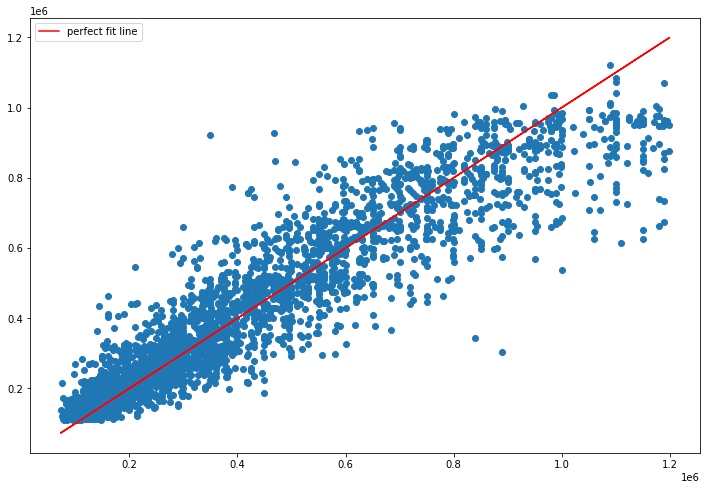

In [131]:
plt.figure(figsize=(12,8))

# Our predictions
plt.scatter(y_test, predis);

# Perfect predictions
plt.plot(y_test, y_test, color='r', label='perfect fit line')
plt.legend();

In [132]:
 from sklearn.neighbors import KNeighborsRegressor

In [133]:
knn= KNeighborsRegressor(n_neighbors=2)

In [134]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [135]:
y_pred = knn.predict(X_test)
y_pred

array([324500., 122500., 252500., ..., 204500., 125000., 374000.])

In [136]:
y_test

id
15742    259000
21456     89000
18830    299000
12951    245000
20794    323000
          ...  
19746    110000
11169    450000
664      227000
5415     138000
16665    175000
Name: buy_price, Length: 3707, dtype: int64

In [137]:
print("Datos del modelo KNeighborsRegressor")
print()
print("Precisión del modelo: ")
print(knn.score(X_train, y_train))

Datos del modelo KNeighborsRegressor

Precisión del modelo: 
0.9404234640668758


In [138]:
KNeighborsRegressor(...)
>>> print(knn.predict([[60, 2, 1, 9, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 12, 1, 0]]))


[230000.]


In [139]:
predoos = knn.predict(X_test)
mae = mean_absolute_error(y_test, predoos)
rmse = np.sqrt(mean_squared_error(y_test, predoos))
print("MAE: %f"  % (mae))
print("RMSE: %f" % (rmse))
print(explained_variance_score(predoos,y_test))

MAE: 73271.143512
RMSE: 118105.232065
0.792041518758166


# **** VAMOS A OPTIMIZAR CON GridSearchCV****

# KNeighborsRegressor

In [140]:
from sklearn.model_selection import GridSearchCV
params = [{
        'n_neighbors': [5,6,7,8],
    }]
kgrid = GridSearchCV(estimator=KNeighborsRegressor(),           
                      param_grid=params, 
                      cv=5,
                      verbose=0) 
kgrid.fit(X_train, y_train)
print(kgrid.best_score_)
print(kgrid.best_estimator_)
print(kgrid.best_params_)
print(list(zip(kgrid.cv_results_['params'],kgrid.cv_results_['mean_test_score'])))

0.8028978385053243
KNeighborsRegressor()
{'n_neighbors': 5}
[({'n_neighbors': 5}, 0.8028978385053243), ({'n_neighbors': 6}, 0.8023400598754152), ({'n_neighbors': 7}, 0.8004638962762911), ({'n_neighbors': 8}, 0.7989750709324752)]


# XGBoost

In [141]:
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
# define dataset
X_train, y_train= make_regression(n_samples=1000, n_features=24, n_informative=5, random_state=1)
# evaluate the model
model = XGBRegressor(objective='reg:squarederror')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -23.811 (2.286)


In [142]:
#XGBoost

params = {
    'max_depth': [10, 15, 20],
    'n_estimators': [50, 60, 70, 80],
    'learning_rate': [0.1]
}
xgrid = GridSearchCV(estimator=xgb.XGBRegressor(),           
                      param_grid=params, 
                      cv=10,
                      verbose=0) 
xgrid.fit(X_train, y_train)
print(xgrid.best_score_)
print(xgrid.best_estimator_)
print(xgrid.best_params_)

0.9264399845895778
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 80}


In [143]:
#XGBoost
params = {
    'max_depth': [5,10,30,50],
    'n_estimators': [5,10,30,50],
    'learning_rate': [.5,0.1,0.05,0.01]
}
xgrid = GridSearchCV(estimator=xgb.XGBRegressor(),           
                      param_grid=params, 
                      cv=5,
                      verbose=0) 
xgrid.fit(X_train, y_train)
print(xgrid.best_score_)
print(xgrid.best_estimator_)
print(xgrid.best_params_)

0.9516092600985824
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [144]:
df=pd.DataFrame({
    'modelo':['Lineal Regresión Multiple','XGB REGRESOR','Support Vector Machine (SVM)','DecisionTreeRegressor','Regresión Líneal Polinomial', 'Bosques Aleatorios Regresión', 'KNeighborsRegressor' ,'KNeighborsRegressorGrid',
             'XGBoostGrid'],
    'score':[0.425, 0.947, 0.602, 0.783, 0.776, 0.892, 0.94, 0.802, 0.951]
})
df

,modelo,score
0,Lineal Regresión Multiple,0.425
1,XGB REGRESOR,0.947
2,Support Vector Machine (SVM),0.602
3,DecisionTreeRegressor,0.783
4,Regresión Líneal Polinomial,0.776
5,Bosques Aleatorios Regresión,0.892
6,KNeighborsRegressor,0.940
7,KNeighborsRegressorGrid,0.802
8,XGBoostGrid,0.951


# EL QUE DA MEJOR RESULTADO DA ES EL XGB REGRESOR.

***EJEMPLO --->***
***Vamos a realizar la prediccion con el algoritmo KNeighborsRegressor optimizado con GridSearchCV***

***PRIMERO VAMOS A VER EL PRECIO DE UNA VIVIENDA DE 60 M,2 HAB,1 BAÑO,PLANTA 9 Y EN EL DISTRITO MAS CARO, EL 5.***

In [145]:

prueba11 = [60, 2, 1, 9, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 5, 0, 1]
new_data = asarray([prueba11])
# make a prediction
yhat = kgrid.predict(new_data)
# summarize prediction
print('Precio de vivienda: %.2f euros' % yhat)

Precio de vivienda: 347400.00 euros


***LUEGO VAMOS A VER EL PRECIO DE UNA VIVIENDA DE 60 M,2 HAB,1 BAÑO,PLANTA BAJA Y EN EL DISTRITO MAS BARATO, EL 12.***

In [146]:
prueba22 = [60, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 12, 1, 0]
new_data = asarray([prueba22])
# make a prediction
yhat = kgrid.predict(new_data)
# summarize prediction
print('Precio de vivienda: %.2f euros' % yhat)

Precio de vivienda: 189221.20 euros


***AHORA VAMOS A VER EL PRECIO DE UNA VIVIENDA DE 60 M,2 HAB,1 BAÑO PLANTA BAJA Y EN EL DISTRITO MAS CARO, EL 5.***

In [147]:
prueba33 = [60, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 5, 0, 1]
new_data = asarray([prueba33])
# make a prediction
yhat = kgrid.predict(new_data)
# summarize prediction
print('Precio de vivienda: %.2f euros' % yhat)

Precio de vivienda: 285800.00 euros


***FINALMENTE VAMOS A VER EL PRECIO DE UNA VIVIENDA DE 60M,2HAB,1 BAÑO,PLANTA 9 Y EN EL DISTRITO MAS BARATO, EL 12.***

In [148]:
prueba44 = [60, 2, 1, 9, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 12, 1, 0]
new_data = asarray([prueba44])
# make a prediction
yhat = kgrid.predict(new_data)
# summarize prediction
print('Precio de vivienda: %.2f euros' % yhat)

Precio de vivienda: 199604.20 euros


# ***Rosana Longares***